In [23]:
import pandas as pd
import numpy as np
import os
import openpyxl
import matplotlib.pyplot as plt

In [3]:
pd.__version__

'1.2.4'

In [4]:
path = 'D:/Tests Décathlon/data/test_data_scientist'
os.listdir(path)

['bu_feat.csv.gz',
 'bu_feat.xlsx',
 'test.csv.gz',
 'test.xlsx',
 'train.csv.gz',
 'train.xlsx',
 '~$bu_feat.xlsx',
 '~$train.xlsx']

In [5]:
xl_file = pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/train.xlsx')
dimensions = xl_file.shape
print(dimensions)

(277719, 4)


In [5]:
xl_file.head()

,day_id,but_num_business_unit,dpt_num_department,turnover
0,2017-09-30,64,127,580.308443
1,2017-09-30,119,127,1512.995918
2,2017-09-30,4,88,668.593556
3,2017-09-30,425,127,0.000000
4,2017-09-30,513,73,0.000000


In [7]:
workbook = openpyxl.load_workbook('D:/Tests Décathlon/data/test_data_scientist/train.xlsx', read_only = True)
sheet = workbook.active

In [8]:
# Question préliminaire 1.a.
turnover_2016=[]
data_2016=[]
# #Affichage de la première ligne du tableau excel
# for row in sheet.iter_rows(min_row = 1, max_row = 1, values_only=True):
#     print(row)
#Remplissage des données intermédiaires seulement pour l'année 2016
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2016' in str(row[0]):
        turnover_2016.append(row[3])
        data_2016.append([row[0], row[1], row[2], row[3]])
index = np.argmax(turnover_2016)
#Récupération des données correspondantes au chiffre d'affaire maximal de 2016
maximum_turnover=data_2016[index][3]
department_number=data_2016[index][2]
business_unit=data_2016[index][1]
date=data_2016[index][0]
#print(data_2016[index])#Affichage des données voulues
print("Le department n°", department_number,"a fait le plus gros chiffre d'affaire de 2016 (", maximum_turnover,")")

Le department n° 127 a fait le plus gros chiffre d'affaire de 2016 ( 9998.346774863414 )


In [9]:
# Question préliminaire 1.b.
data_2015_dept_88=[]
#Séléction des données utiles : lignes pour l'année 2015 du département 88
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2015' in str(row[0]) and row[2]==88:
        data_2015_dept_88.append([row[0], row[1], row[2], row[3]])
#print(data_2015_dept_88)
data_2015_dept_88.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2015_dept_88[0][0]
week_number=1
total_turnover=0
recap_table=[]
for line in data_2015_dept_88:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table)
recap_table.sort(key=lambda x:x[1]) #On trie recap_table en fonction du 2ème terme
recap_table.reverse()
#print(recap_table)
print("À travers tous les magasins, les 5 meilleures semaines en terme de chiffre d'affaire pour le département 88 en 2015 sont les semaines ", recap_table[0][0],",", recap_table[1][0],",", recap_table[2][0],",", recap_table[3][0],"et", recap_table[4][0])

À travers tous les magasins, les 5 meilleures semaines en terme de chiffre d'affaire pour le département 88 en 2015 sont les semaines  27 , 37 , 36 , 38 et 28


In [10]:
# Question préliminaire 1.c.
store_list=[]
store_performance_table=[]
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if row[1] not in store_list:
        store_list.append(row[1]) #Initialisation de ma liste des magasins
for i in range(len(store_list)):
    store_performance_table.append([store_list[i], 0]) #Initialisation de mon tableau récap des performances des magasins
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2014' in str(row[0]):
        store_performance_table[store_list.index(row[1])][1]+=round(float(row[3])) #On cumule les chiffres d'affaires de chaque magasin
store_performance_table.sort(key=lambda x:x[1]) #On trie store_performance_table en fonction du 2ème terme
store_performance_table.reverse()
#print(store_performance_table)
print("Le magasin (ou la buisiness_unit) le plus performant de 2014 est le n°", store_performance_table[0][0], "avec un chiffre d'affaire total de", store_performance_table[0][1])

Le magasin (ou la buisiness_unit) le plus performant de 2014 est le n° 121 avec un chiffre d'affaire total de 327804


In [48]:
# Question préliminaire 1.d.

#On va regrouper les données du département 73 pour les années 2013 à 2016 (années complètes)

data_2016_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2016 du département 73
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2016' in str(row[0]) and row[2]==73:
        data_2016_dept_73.append([row[0], row[1], row[2], row[3]])
#print(data_2016_dept_73)
data_2016_dept_73.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2016_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2016=[]
for line in data_2016_dept_73:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2016.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2016.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2016)
abs_2016=[]
ord_2016=[]
for i in range(len(recap_table_2016)): #Préparation pour l'affichage
    abs_2016.append(recap_table_2016[i][0])
    ord_2016.append(recap_table_2016[i][1])

In [49]:
#2015
data_2015_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2015 du département 73
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2015' in str(row[0]) and row[2]==73:
        data_2015_dept_73.append([row[0], row[1], row[2], row[3]])
#print(data_2015_dept_73)
data_2015_dept_73.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2015_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2015=[]
for line in data_2015_dept_73:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2015.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2015.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2015)
abs_2015=[]
ord_2015=[]
for i in range(len(recap_table_2015)):
    abs_2015.append(recap_table_2015[i][0])
    ord_2015.append(recap_table_2015[i][1])

In [50]:
#2014
data_2014_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2014 du département 73
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2014' in str(row[0]) and row[2]==73:
        data_2014_dept_73.append([row[0], row[1], row[2], row[3]])
#print(data_2014_dept_73)
data_2014_dept_73.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2014_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2014=[]
for line in data_2014_dept_73:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2014.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2014.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2014)
abs_2014=[]
ord_2014=[]
for i in range(len(recap_table_2014)):
    abs_2014.append(recap_table_2014[i][0])
    ord_2014.append(recap_table_2014[i][1])

In [51]:
#2013
data_2013_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2013 du département 73
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2013' in str(row[0]) and row[2]==73:
        data_2013_dept_73.append([row[0], row[1], row[2], row[3]])
#print(data_2013_dept_73)
data_2013_dept_73.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2013_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2013=[]
for line in data_2013_dept_73:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2013.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2013.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2013)
abs_2013=[]
ord_2013=[]
for i in range(len(recap_table_2013)):
    abs_2013.append(recap_table_2013[i][0])
    ord_2013.append(recap_table_2013[i][1])

In [52]:
#2017 (année incomplète mais les données sont quand même intéressantes)
data_2017_dept_73=[]
#Séléction des données utiles : lignes pour l'année 2017 du département 73
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2017' in str(row[0]) and row[2]==73:
        data_2017_dept_73.append([row[0], row[1], row[2], row[3]])
#print(data_2017_dept_73)
data_2017_dept_73.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2017_dept_73[0][0]
week_number=1
total_turnover=0
recap_table_2017=[]
for line in data_2017_dept_73:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2017.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2017.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2017)
abs_2017=[]
ord_2017=[]
for i in range(len(recap_table_2017)):
    abs_2017.append(recap_table_2017[i][0])
    ord_2017.append(recap_table_2017[i][1])

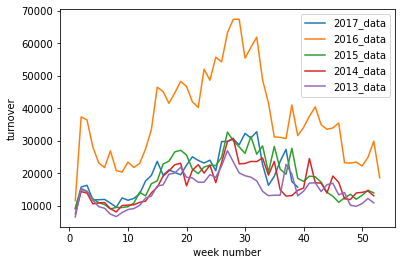

In [53]:
plt.plot(abs_2017, ord_2017)
plt.plot(abs_2016, ord_2016)
plt.plot(abs_2015, ord_2015)
plt.plot(abs_2014, ord_2014)
plt.plot(abs_2013, ord_2013)
plt.legend(["2017_data", "2016_data", "2015_data", "2014_data", "2013_data"])
plt.xlabel('week number')
plt.ylabel('turnover')
plt.show()

In [54]:
# Question préliminaire 1.e.

#On va regrouper les données du département 73 pour les années 2013 à 2016 (années complètes)

data_2016_dept_117=[]
#Séléction des données utiles : lignes pour l'année 2016 du département 117
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2016' in str(row[0]) and row[2]==117:
        data_2016_dept_117.append([row[0], row[1], row[2], row[3]])
#print(data_2016_dept_117)
data_2016_dept_117.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2016_dept_117[0][0]
week_number=1
total_turnover=0
recap_table_2016=[]
for line in data_2016_dept_117:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2016.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2016.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2016)
abs_2016=[]
ord_2016=[]
for i in range(len(recap_table_2016)): #Préparation pour l'affichage
    abs_2016.append(recap_table_2016[i][0])
    ord_2016.append(recap_table_2016[i][1])

In [55]:
#2015
data_2015_dept_117=[]
#Séléction des données utiles : lignes pour l'année 2015 du département 117
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2015' in str(row[0]) and row[2]==117:
        data_2015_dept_117.append([row[0], row[1], row[2], row[3]])
#print(data_2015_dept_117)
data_2015_dept_117.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2015_dept_117[0][0]
week_number=1
total_turnover=0
recap_table_2015=[]
for line in data_2015_dept_117:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2015.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2015.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2015)
abs_2015=[]
ord_2015=[]
for i in range(len(recap_table_2015)): #Préparation pour l'affichage
    abs_2015.append(recap_table_2015[i][0])
    ord_2015.append(recap_table_2015[i][1])

In [56]:
#2014
data_2014_dept_117=[]
#Séléction des données utiles : lignes pour l'année 2014 du département 117
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2014' in str(row[0]) and row[2]==117:
        data_2014_dept_117.append([row[0], row[1], row[2], row[3]])
#print(data_2014_dept_117)
data_2014_dept_117.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2014_dept_117[0][0]
week_number=1
total_turnover=0
recap_table_2014=[]
for line in data_2014_dept_117:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2014.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2014.append([week_number, total_turnover]) #Ajout pour le dernière semaine
#print(recap_table_2014)
abs_2014=[]
ord_2014=[]
for i in range(len(recap_table_2014)): #Préparation pour l'affichage
    abs_2014.append(recap_table_2014[i][0])
    ord_2014.append(recap_table_2014[i][1])

In [57]:
#2013
data_2013_dept_117=[]
#Séléction des données utiles : lignes pour l'année 2013 du département 117
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2013' in str(row[0]) and row[2]==117:
        data_2013_dept_117.append([row[0], row[1], row[2], row[3]])
#print(data_2013_dept_117)
data_2013_dept_117.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2013_dept_117[0][0]
week_number=1
total_turnover=0
recap_table_2013=[]
for line in data_2013_dept_117:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2013.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2013.append([week_number, total_turnover]) #Ajout pour la dernière semaine
#print(recap_table_2013)
abs_2013=[]
ord_2013=[]
for i in range(len(recap_table_2013)): #Préparation pour l'affichage
    abs_2013.append(recap_table_2013[i][0])
    ord_2013.append(recap_table_2013[i][1])

In [59]:
#2017 (année incomplète)
data_2017_dept_117=[]
#Séléction des données utiles : lignes pour l'année 2017 du département 117
for row in sheet.iter_rows(min_row = 2, max_row = 277719, values_only=True):
    if '2017' in str(row[0]) and row[2]==117:
        data_2017_dept_117.append([row[0], row[1], row[2], row[3]])
#print(data_2017_dept_117)
data_2017_dept_117.reverse() #On inverse la liste pour avoir les premières données qui correspondent à la première semaine
#Initialisation de mes variables et de mon tableau récapitulatif (recap_table)
date=data_2017_dept_117[0][0]
week_number=1
total_turnover=0
recap_table_2017=[]
for line in data_2017_dept_117:
    if line[0]!=date:#On regarde si on a changé de semaine
        recap_table_2017.append([week_number, total_turnover])
        week_number+=1 #Si oui, on rajoute une ligne dans le recap_table 
        total_turnover=0 #avec le numéro de la semaine et le chiffre d'affaire total
        date=line[0]
    else:
        total_turnover+=round(float(line[3])) #Sinon on augmente seulement le chiffre d'affaire total de la semaine
recap_table_2017.append([week_number, total_turnover]) #Ajout pour la dernière semaine
#print(recap_table_2017)
abs_2017=[]
ord_2017=[]
for i in range(len(recap_table_2017)): #Préparation pour l'affichage
    abs_2017.append(recap_table_2017[i][0])
    ord_2017.append(recap_table_2017[i][1])

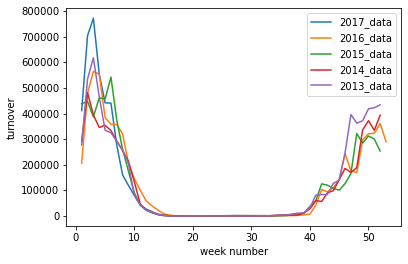

In [67]:
plt.plot(abs_2017, ord_2017)
plt.plot(abs_2016, ord_2016)
plt.plot(abs_2015, ord_2015)
plt.plot(abs_2014, ord_2014)
plt.plot(abs_2013, ord_2013)
plt.legend(["2017_data", "2016_data", "2015_data", "2014_data", "2013_data"])
plt.xlabel('week number')
plt.ylabel('turnover')
plt.show()

In [69]:
# Forecast model 2.a.

import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "z1VqB59mG9ARUWBx4qDUdfe5D4pIJzlxAIPL1XsThq8V"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

# Request header
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# Récupération des données depuis le doc excel
df=pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/test.xlsx')
df['day_id'] = df['day_id'].astype(str)
df.fillna(0, inplace=True)

# Setup des données
payload_scoring = {"input_data": [{"fields": ["day_id", "but_num_business_unit", "dpt_num_department"], "values": df.values.tolist()}]}

# Execution de la requête
response_scoring = requests.post('https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/214cd720-4749-4d1b-8a72-ba98e0012343/predictions?version=2021-06-21', json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})
predictions = response_scoring.json()
df['turnover'] = [x[0] for x in predictions['predictions'][0]['values']]
df = df[['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover']]
df.to_excel('D:/Tests Décathlon/data/test_data_scientist/test_predicted_turnover.xlsx')
# Les prédictions sont ajoutées dans une colonne 'turnover' et celle-ci est ajoutée dans le dataframe df

In [71]:
predicted_df = pd.read_excel('D:/Tests Décathlon/data/test_data_scientist/test_predicted_turnover.xlsx')
predicted_df.tail()

,Unnamed: 0,day_id,but_num_business_unit,dpt_num_department,turnover
10131,10131,2017-10-07,61,88,1107.534912
10132,10132,2017-10-07,641,117,518.551392
10133,10133,2017-10-07,724,117,400.991974
10134,10134,2017-10-07,1302,117,318.826019
10135,10135,2017-10-07,1126,88,18.257023
